In [1]:
# Importer les librairies
#!pip install keras
#!pip install tensorflow
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from keras.utils.vis_utils import plot_model

In [2]:
# Importer le dataset
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Séparation de data et target
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [4]:
# Définition d'un modèle avec Keras
model = Sequential()

# on crée un première couche cachée de 12 noeuds qui attend en input 8 features
model.add(Dense(12, input_dim=8, activation='relu'))
# on crée une deuxième couche cachée de 8 noeuds qui attend en input 12 resultats de la couches précédente
model.add(Dense(8, activation='relu'))
# on crée une troisième couche cachée de 1 noeud qui attend en input 8 resultats de la couches précédente
model.add(Dense(1, activation='sigmoid'))

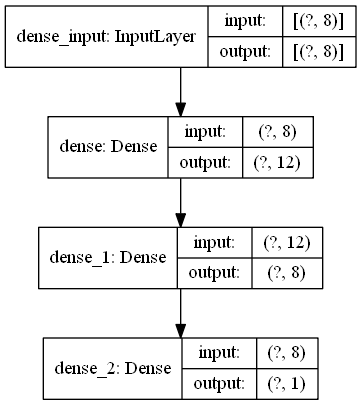

In [5]:
# Visualisation du modèle
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
# Ajout de parametre dans le modèle

# loss='binary_crossentropy' => Calcule la perte d'entropie croisée entre les valeurs réelles et les valeurs prédites.
# optimizer='adam' => L'optimisation d'Adam est une méthode stochastique de descente de gradient qui est basée 
#                     sur l'estimation adaptative des moments du premier et du second ordre
# metrics=['accuracy'] => On optimise le modèle de manière à avoir la meilleur accuracy(précision) possible

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Entrainement du modèle

#Une époque est celle où un ensemble de données ENTIER est transmis en avant et en arrière à travers 
#le réseau neuronal seulement UNE FOIS.
#Comme une époque est trop grande pour être transmise à l'ordinateur en une seule fois, nous la divisons 
#en plusieurs lots plus petits.

model.fit(X, y, epochs=200, batch_size=10, verbose=0)

In [11]:
# Evaluation du modèle
_, accuracy = model.evaluate(X, y, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8125
Accuracy: 81.25


In [12]:
predictions = model.predict_classes(X)
# Affichage des 5 premières lignes d'apprentissage et comparer avec le résultat attendu
for i in range(5):
    print('%s => %d (expected %d)' % (X.iloc[i].tolist(), predictions[i], y[i]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.35100000000000003, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.16699999999999998, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.2880000000000003, 33.0] => 1 (expected 1)
